In [9]:
%matplotlib inline 

from __future__ import division, print_function
from vpython import *
from math import *
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

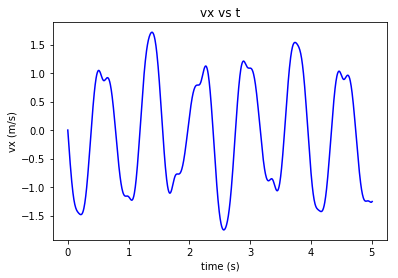

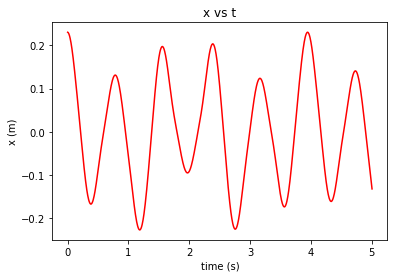

In [11]:
g=9.8  #m/s^2
k=50   #N/m
t=0

mass=0.3 #kg
L0=0.15 #m       equilibrium length
L=vec(.23,-0.1,0) #m       initial position

F_grav=vec(0,-mass*g,0)
#F_floor=-F_grav
F_floor = vec(0,0,0)

scene=canvas(title="Spring Pendulum")
top = box(pos=vec(0,0,0),length=0.5, width=0.01, height=0.01)
spring = helix(pos=vec(0,0,0), axis=L, radius=0.02, length = mag(L), coils=10, color=color.yellow)
ball=sphere(pos=L,radius=0.03, color=color.red, make_trail=True)
ball.v=vec(0,0,0)
ball.p = mass  * ball.v

dt=0.005

tlist=[]
xlist=[]
vxlist=[]

tlist.append(t)
xlist.append(ball.pos.x)
vxlist.append(ball.v.x)


while t<5:
    rate(100)
    L_hat=L/mag(L)
    s = (mag(L)-L0)*L_hat
    F_sp=-k*s
    F_net=F_sp+F_grav+F_floor
    ball.p=ball.p+F_net*dt
    L=L+(ball.p/mass)*dt
    spring.length=mag(L)
    spring.axis=L
    ball.pos=L
    ball.v=ball.p/mass
    t=t+dt
    
    tlist.append(t)
    xlist.append(ball.pos.x)
    vxlist.append(ball.p.x/mass)
    
#plot vx vs t
plt.title('vx vs t')
plt.xlabel('time (s)')
plt.ylabel('vx (m/s)')
plt.plot(tlist, vxlist, 'b-')
plt.show()

#plot x vs t
plt.title('x vs t')
plt.xlabel('time (s)')
plt.ylabel('x (m)')

plt.plot(tlist, xlist,'r-')
plt.show()


    